In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('results/13C_pg_10_cm.txt')
data[:,2] = data[:,2] / np.max(data[:,2])

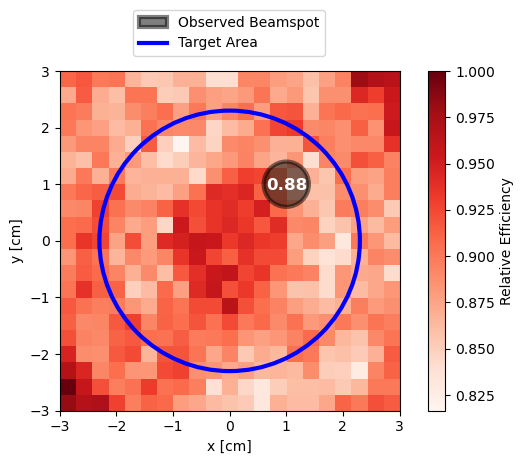

In [3]:
nbins = 21

fig = plt.figure()

ax = fig.add_subplot(111)

x = data[:,0]
y = data[:,1]
z = data[:,2]

histo = np.zeros((nbins,nbins))
histo, xedges, yedges = np.histogram2d(x, y, bins=(nbins,nbins), range=[[-3,3],[-3,3]], weights=z)

histo = histo.T

ax.imshow(histo, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')

# Plot a circle of radius 2.1 cm
circle = plt.Circle((0, 0), 2.3, color='b', lw=3, fill=False)
ax.add_artist(circle)

# Show z axis as a color bar
cbar = plt.colorbar(ax.imshow(histo, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds', label='Relative Efficiency'))
cbar.set_label('Relative Efficiency')

# Find where intensity is at (1 cm, 1cm)
x_idx = np.abs(xedges - 1).argmin()
y_idx = np.abs(yedges - 1).argmin()

value = histo[y_idx, x_idx]

# Plot a circle in the center of (1 cm, 1 cm)
circle = plt.Circle((xedges[x_idx], yedges[y_idx]), 0.4, color='black', lw=3, fill=True, label="Observed Beamspot", alpha=0.5)
ax.add_artist(circle)

# Bold font text
ax.text(0.64, 0.9, '{}'.format(round(value,2)), color='white', fontsize=12, fontweight='bold')

# Collect all legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Circles don't have labels, so add a dummy handle and label
handles.append(plt.Line2D([0], [0], color='b', lw=3))
labels.append('Target Area')

# Add the legend
ax.legend(handles, labels, bbox_to_anchor=(0.8, 1.2))

plt.tight_layout()

plt.savefig('plots/13C_pg.png', dpi=300)
plt.show()